In [1]:
import matplotlib.pyplot as plt
from matplotlib import image
from random_image import get_random_image

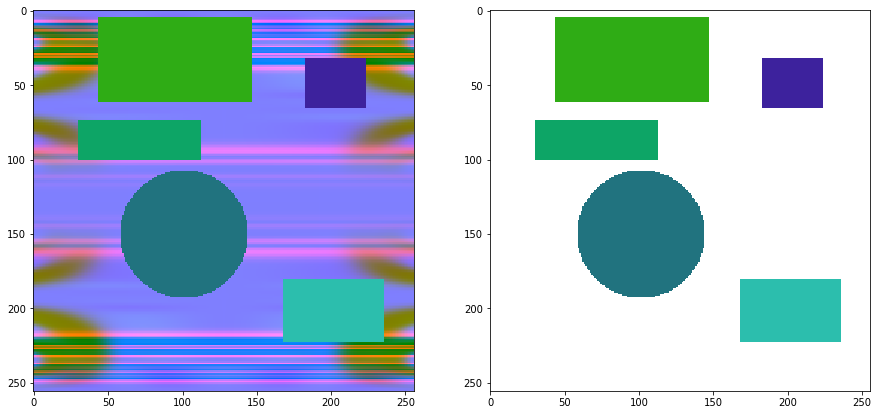

In [2]:
image_in, image_out = get_random_image(image_dim=256)
plt.figure(None, figsize=(15,15))
plt.subplot(121)
plt.imshow(image_in)
plt.subplot(122)
plt.imshow(image_out)
plt.show()

In [3]:
import os
from uuid import uuid4
DATA_PATH = '/home/dl/data/'
PROJECT_PATH = DATA_PATH + 'CAN/'
DATASET_PATH = PROJECT_PATH + 'v1/'
INPUT_IMAGES_PATH = DATASET_PATH + 'clean/'
OUTPUT_IMAGES_PATH = DATASET_PATH + 'noisy/'
os.makedirs(INPUT_IMAGES_PATH, exist_ok=True)
os.makedirs(OUTPUT_IMAGES_PATH, exist_ok=True)

In [4]:
def generate_image(i):
    image_noisy, image_clean = get_random_image(image_dim=512)
    filename = str(uuid4())[:8] + '.png'
    image.imsave(INPUT_IMAGES_PATH + filename, image_clean)
    image.imsave(OUTPUT_IMAGES_PATH + filename, image_noisy)

In [ ]:
import tqdm
import multiprocessing
num_images = 10000
pool = multiprocessing.Pool(8)
for _ in tqdm.tqdm_notebook(pool.imap_unordered(generate_image, range(num_images)), total=num_images):
    pass
pool.close()
pool.join()

In [8]:
len(os.listdir('/home/dl/data/CAN/v1/noisy/'))

10000